In [1]:
import weyl_chain as wc
import weyl_green as wg
%load_ext autoreload
%autoreload 2

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

The Hamiltonian is
\begin{align}
\label{eq:system}
H = \sum_{y = 0}^{L_y} \left( h_w c^{\dagger}_{y} c_y + h_m d^{\dagger}_{y} d_y + R_w^{\dagger} c^{\dagger}_{y+1} c_y  
 + R_m^{\dagger} d^{\dagger}_{y+1} d_y + \mathrm{h.c.} \right)+ r \left(c^{\dagger}_1 d_1 + d^{\dagger}_1 c_1\right)
\end{align}
where 
\begin{align}
h_w &= t\sin{k_x} \sigma_x + t\left(2 -\cos{k_x} -\cos{k_z} \right)\sigma_z = g_1 \sigma_x + g_3 \sigma_z \\
R^{\dagger}_w &= t \left(\frac{i}{2} \sigma_y - \frac{1}{2} \sigma_z \right) \\
h_m &= -t\left(\cos{k_x}+\cos{k_z}\right) - \mu \\
R^{\dagger}_m &= - \frac{t}{2}
\end{align}
with $\mu$ as the chemical potential and $m$ as the metal's effective mass, measured in units of $t$ and $t^{-1}$, respectively.

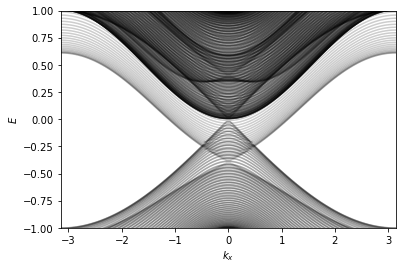

In [42]:
kxs, Es = wc.BulkSpectrumSummedOver(size=10,res=100,kz=np.pi/2,t=1,g=0,mu=-2,r=2.3)

plt.figure()
plt.xlabel(r"$k_x$")
plt.ylabel(r"$E$")
plt.ylim(-1,1)
plt.xlim(-np.pi,np.pi)
plt.plot(kxs,Es,c='k',alpha=0.1)
plt.show()

In [34]:
res=100
As_0 = np.zeros((res,res),dtype=float)
As_23 = np.zeros((res,res),dtype=float)
kxs = np.linspace(-1,1,res)

for i in range(res):
    kx = kxs[i]
    As_0[:,i] = wc.FullSpectralFunctionWeylWK(res=res,kx=kx,kz=np.pi/2,t=1,g=0,mu=-4,r=0,spin=-1)
    As_23[:,i] = wc.FullSpectralFunctionWeylWK(res=res,kx=kx,kz=np.pi/2,t=1,g=0,mu=-4,r=2.3,spin=-1)

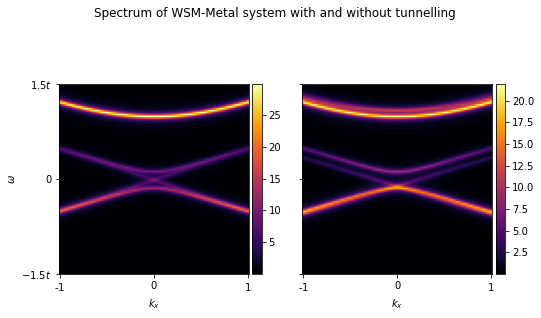

In [36]:
fig,ax=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(8,5))

plt.suptitle("Spectrum of WSM-Metal system with and without tunnelling")

im0 = ax[0].imshow(As_0,cmap='inferno')
ax[0].set_ylim(0,res)
ax[0].set_yticks([0,int(res/2),res])
ax[0].set_yticklabels(["$-1.5t$","0","$1.5t$"])
ax[0].set_xticks([0,int(res/2)-1/2,res-1])
ax[0].set_xticklabels([r"-$1$",r"0",r"$1$"])
ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$\omega$")

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1].imshow(As_23,cmap='inferno')
ax[1].set_xlabel(r"$k_x$")
ax[1].set_xticks([0,int(res/2)-1/2,res-1])
ax[1].set_xticklabels([r"-$1$",r"0",r"$1$"])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()